<a href="https://colab.research.google.com/github/urieliram/tc_uc/blob/main/Figures_TC_UC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

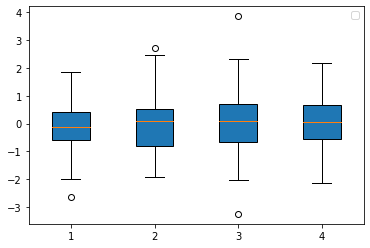

In [4]:
# load packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
cm = 1/2.54

#https://towardsdatascience.com/making-publication-quality-figures-in-python-part-iii-box-plot-bar-plot-scatter-plot-407fa457449
# prepare some data
np.random.seed(42)
data1 = np.random.randn(100)
data2 = np.random.randn(100)
data3 = np.random.randn(100)
data4 = np.random.randn(100)

fig,ax = plt.subplots()
bp = ax.boxplot(x=[data1,data2,data3,data4],  # sequence of arrays
positions=[1,2,3,4],   # where to put these arrays
patch_artist=True)  # allow filling the box with colors
ax.legend()
namefile = 'boxplot_'+'.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

In [5]:
df = pd.read_csv('stat.csv',usecols=[9,10,11,12,13,14,15,16],header=0 ,  )#names=['MILP','FP','Harjk','Hard','LB1','LB2','LB3','KS']
                                                                        #dtype={'MEM1':float,'MEM2':float,'MEM3':float,'MEM4':float}

##      z_milp	z_feas	z_harjk	z_hard3	z_lbc1	z_lbc2	z_lbc3	z_ks    (09-16)
##    	t_milp	t_feas	t_harjk	t_hard3	t_lbc1	t_lbc2	t_lbc3	t_ks    (18-26)
##      g_milp	g_feas	g_harjk	g_hard3	g_lbc1	g_lbc2	g_lbc3	g_ks    (28-35)

In [6]:
df

,z_milp,z_feas,z_harjk,z_hard3,z_lbc1,z_lbc2,z_lbc3,z_ks
0,3.016007e+07,1.000000e+75,3.017386e+07,3.018884e+07,3.017591e+07,3.017672e+07,NaN,30180844.2
1,2.821402e+07,1.000000e+75,2.822161e+07,2.822110e+07,2.821585e+07,2.821396e+07,NaN,28215870.6
2,1.000000e+75,1.000000e+75,1.000000e+75,2.822110e+07,2.822110e+07,1.000000e+75,NaN,0.0
3,1.000000e+75,1.000000e+75,1.000000e+75,2.822110e+07,2.822110e+07,1.000000e+75,NaN,0.0
4,1.000000e+75,1.000000e+75,1.000000e+75,2.822110e+07,2.821413e+07,1.000000e+75,NaN,0.0
5,3.171840e+07,1.000000e+75,3.174306e+07,3.174072e+07,3.172738e+07,3.172497e+07,NaN,4163640.0
6,2.581821e+07,1.000000e+75,2.582693e+07,2.582082e+07,2.581582e+07,2.581796e+07,NaN,25820534.7
7,3.042545e+07,1.000000e+75,3.043368e+07,3.044534e+07,3.042877e+07,3.043259e+07,NaN,30444232.6
8,3.313514e+07,1.000000e+75,1.000000e+75,3.315209e+07,3.313865e+07,3.313865e+07,NaN,33151131.3
9,2.981556e+07,1.000000e+75,2.983154e+07,2.982189e+07,2.981679e+07,2.981698e+07,NaN,29817899.5


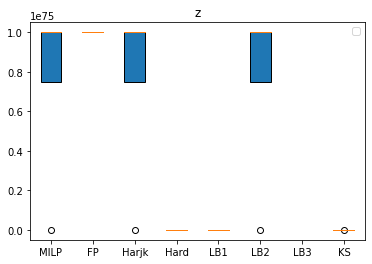

In [7]:
##Imprimir Z
data1  = df.z_milp[1:5].to_numpy()
data2  = df.z_feas[1:5].to_numpy()
data3  = df.z_harjk[1:5].to_numpy()
data4  = df.z_hard3[1:5].to_numpy()
data5  = df.z_lbc1[1:5].to_numpy()
data6  = df.z_lbc2[1:5].to_numpy()
data7  = df.z_lbc3[1:5].to_numpy()
data8  = df.z_ks[1:5].to_numpy()
labels = ['MILP','FP','Harjk','Hard','LB1','LB2','LB3','KS']
x=[data1,data2,data3,data4,data5,data6,data7,data8]
fig,ax = plt.subplots()
ax.set_title('z')
bp = ax.boxplot(x,           
positions=[1,2,3,4,5,6,7,8],   # where to put these arrays
labels = labels, patch_artist=True)  # allow filling the box with colors
ax.legend()
namefile = 'fig:z'+'.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

## GRÁFICOS DE CONVERGENCIA


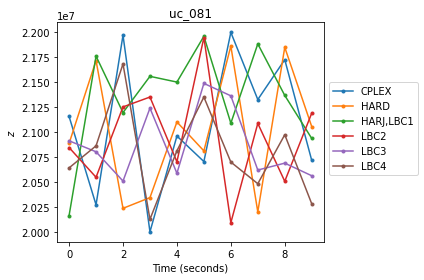

In [8]:
title = 'uc_081'

plt.figure()

models = ["CPLEX","HARD","HARJ"",LBC1", "LBC2","LBC3", "LBC4","KS"]
for i in range(6):
  # define data values
  x = np.arange(10)  # X-axis points
  y = np.random.randint(low = 20000000, high = 22000000, size=10)  # Y-axis points
  plt.plot(x, y, '.-', label = models[i])

plt.xlabel("Time (seconds)")
plt.ylabel("$z$")
plt.title(title)
plt.legend(bbox_to_anchor=(1, 0.75))
plt.tight_layout()
plt.savefig('test.pdf')
plt.show()

In [9]:
    data1=df.loc[(df['instance'] == mem) & (df['percent'] == 70)][graph].to_numpy()
    data2=df.loc[(df['instance'] == mem) & (df['percent'] == 80)][graph].to_numpy()
    data3=df.loc[(df['instance'] == mem) & (df['percent'] == 90)][graph].to_numpy()
    data4=df.loc[(df['instance'] == mem) & (df['percent'] == 95)][graph].to_numpy()
    x.append([data1,data2,data3,data4])

  fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(12*cm,11.5*cm),gridspec_kw={'wspace':0.5,'hspace':0.5})
  labels = ['70%', '80%', '90%', '95%']
  axs[0, 0].boxplot(x=x[0],labels = labels,patch_artist=True)
  axs[0, 0].set_title('Profit')
  axs[0, 1].boxplot(x=x[1],labels = labels,patch_artist=True)
  axs[0, 1].set_title('CPU time')
  axs[1, 0].boxplot(x=x[2],labels = labels,patch_artist=True)
  axs[1, 0].set_title('MP-SP iterations')
  axs[1, 1].boxplot(x=x[3],labels = labels,patch_artist=True)
  axs[1, 1].set_title('Tie-line violated')

  namefile = mem+'.pdf'
  plt.savefig(namefile, transparent=True)
  plt.show()

IndentationError: ignored